# ***FIFA 19 DATA ANALYSIS AND VISUALIZATION***

## **1. Storing data in a dataframe.**

In [91]:
import os
import pandas as pd
import numpy as np

In [116]:
from google.colab import files
uploaded = files.upload()
# data_csv = pd.read_csv('house_dataset.csv')

Saving data.csv to data (1).csv


In [117]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "data.csv" with length 9140113 bytes


In [118]:
import io
df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))

In [119]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## **2. Data Cleaning**

Now that the data is loaded into the dataframe **df**, we can proceed with the data cleaning. 

**Data cleaning** is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.

Therefore before passing on for analysis and visualization, we will check for any null or missing values.

In [120]:
#First inspect All columns for their types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [121]:
# Now check for null values
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

### Now that we know that there exist null values in the given columns we begin replacing them by their:

### **Mean Value**: 
In the given dataframe there are some Discrete and Continuous variables and will be replaced by the **Mean Value** of the given attribute.

In [122]:
temp_mean = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]
for i in temp_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

### **Mode Value**: 
In the given dataframe there are some Categorical variables and will be replaced by the **Mode Value** of the given attribute.

In [123]:
temp_mode = df.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in temp_mode.columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

### **Median Value**: 
In the given dataframe there are some  discrete numerical or continuous numerical variables and will be replaced by the **Median Value** of the given attribute.

In [124]:
temp_median = df.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in temp_median.columns:
    df[i].fillna(df[i].median(), inplace = True)

### Now check for any None values, if any, exclude them from the new dataframe.

In [125]:
# Check for the remaining na columns, if any 
df.columns[df.isna().any()]

Index(['Club', 'Work Rate', 'Real Face', 'Position', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [126]:
'''Choose the remaining columns for analysing the data'''
chosen_columns = ['Name','Age','Nationality','Overall','Potential','Club','Value','Wage','Special','Preferred Foot','International Reputation','Weak Foot','Skill Moves','Body Type','Position','Jersey Number','Height','Weight','Crossing', 'Finishing', 'HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy','LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed','Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping','Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions','Positioning', 'Vision', 'Penalties', 'Composure', 'Marking','StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']

In [127]:
data = pd.DataFrame(df, columns = chosen_columns)
display(data.head())

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Messi,RF,10.0,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,7.0,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,Neymar,LW,10.0,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Lean,GK,1.0,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,Normal,RCM,7.0,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [128]:
data.columns[data.isna().any()]

Index(['Club', 'Position'], dtype='object')

In [129]:
#We can replace these last missing values as follows.
data['Club'].fillna('No Club', inplace = True)
data['Position'].fillna('ST', inplace = True)

### The remaining cleaning of part of datatype conversion to assist visualization:

In [150]:
# Convert weight from string to float
def extract_value_from(value):
    if type(value)!=float:
      x = value.replace('lbs', '')
      return float(x)
    else:
      return value

# Convert height from feet to inches (string to integer)
def feet_to_inches(value):
  if type(value)!=int:
    tmp = value.split("'")
    return int(tmp[0]) * 12 + int(tmp[1]) #converting feet to inches
  else:
    return value

# Convert currency from string to float
def convert_currency(value):
  if type(value)!=float:
    x = value.replace('€', '')
    if 'M' in x:
        x = float(x.replace('M', ''))*100000
    elif 'K' in value:
        x = float(x.replace('K', ''))*1000
    return float(x)
  else:
    return value

In [151]:
'''Appling the funtion to Height, Weight, Value and Wage columns'''
data['Weight'] = data['Weight'].apply(lambda x: extract_value_from(x))
data['Height'] = data['Height'].apply(lambda x: feet_to_inches(x))
data['Value'] =  data['Value'].apply(lambda x: convert_currency(x))
data['Wage'] =  data['Wage'].apply(lambda x: convert_currency(x))

## **3. Addition of new Columns for analysis**

Now we define our own attributes that are basically the mean of one or more attributes, and they define the aggregate qualities as a result of all the attributes.

Start off by defining functions for this:

In [257]:
def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                            'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                            'Vision','Composure']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                            'Agility','Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                            'Strength']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                            'ShotPower','LongShots', 'Penalties']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                            'LongPassing']].mean()).mean()))

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                            'SlidingTackle']].mean()).mean()))

def goalkeeping(data):
    return int(round((data[['GKDiving', 'GKHandling', 'GKKicking', 
                            'GKPositioning', 'GKReflexes']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

In [258]:
'''Adding new attributes to data'''
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis =1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Defending'] = data.apply(defending, axis =1)
data['Goalkeeping'] = data.apply(goalkeeping, axis = 1)
data['Rating'] = data.apply(rating, axis =1)

## **4. Data Visualization**


In [204]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_theme()

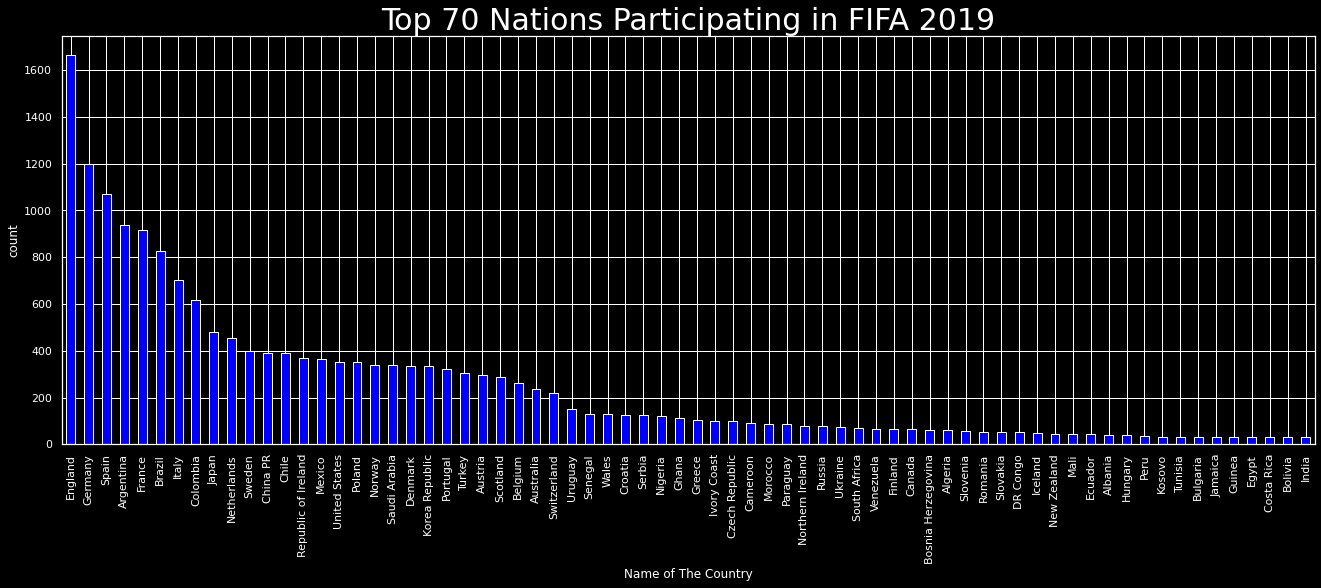

In [205]:
# To show Different nations participating in the FIFA 2019

plt.style.use('dark_background')
data['Nationality'].value_counts().head(70).plot.bar(color = 'blue', figsize = (20, 7))
plt.title('Top 70 Nations Participating in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

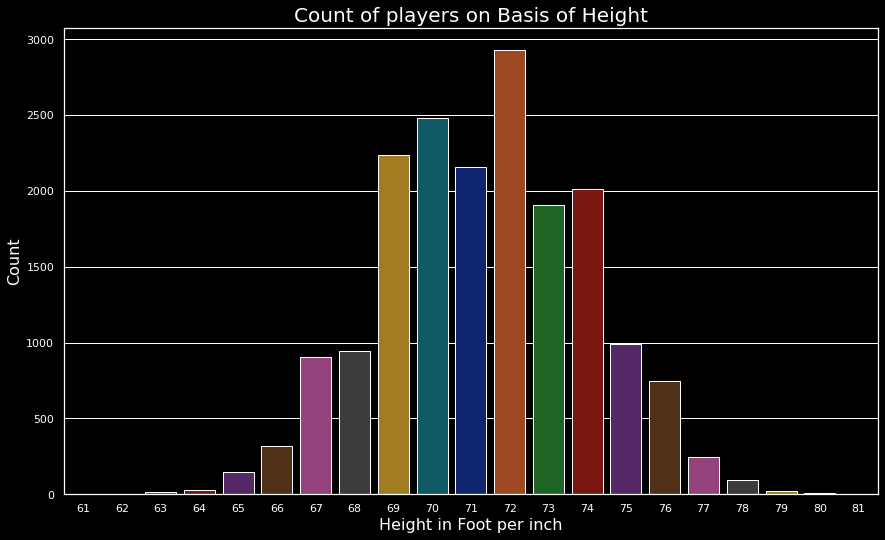

In [206]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

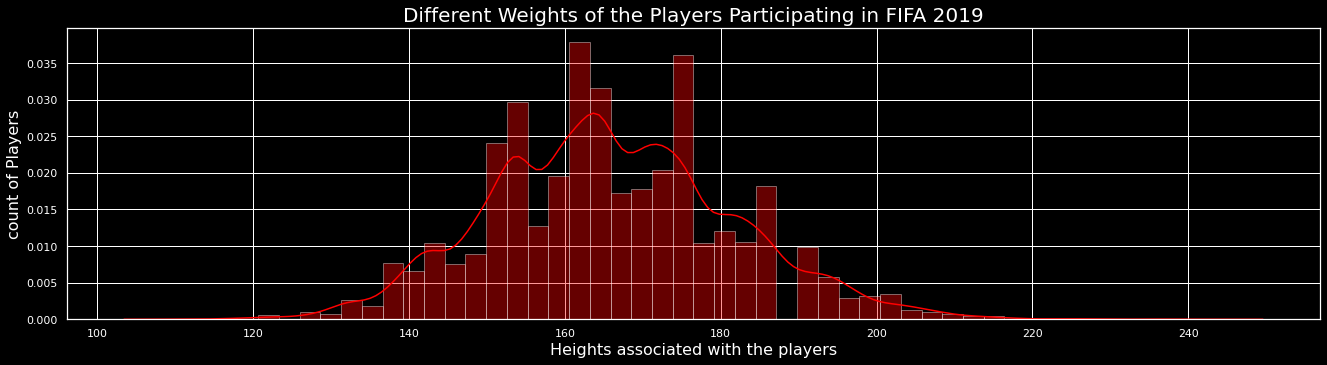

In [207]:
# To show Different body weight of the players participating in the FIFA 2019

plt.figure(figsize = (20, 5))
# plt.style.use('_classic_test')
sns.distplot(data['Weight'], color = 'Red')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

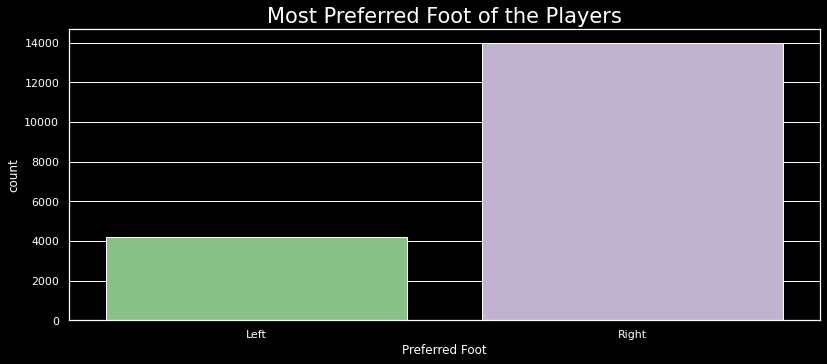

In [208]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (12, 5)
sns.countplot(data['Preferred Foot'], palette = 'Accent')
plt.title('Most Preferred Foot of the Players', fontsize = 21)
plt.show()

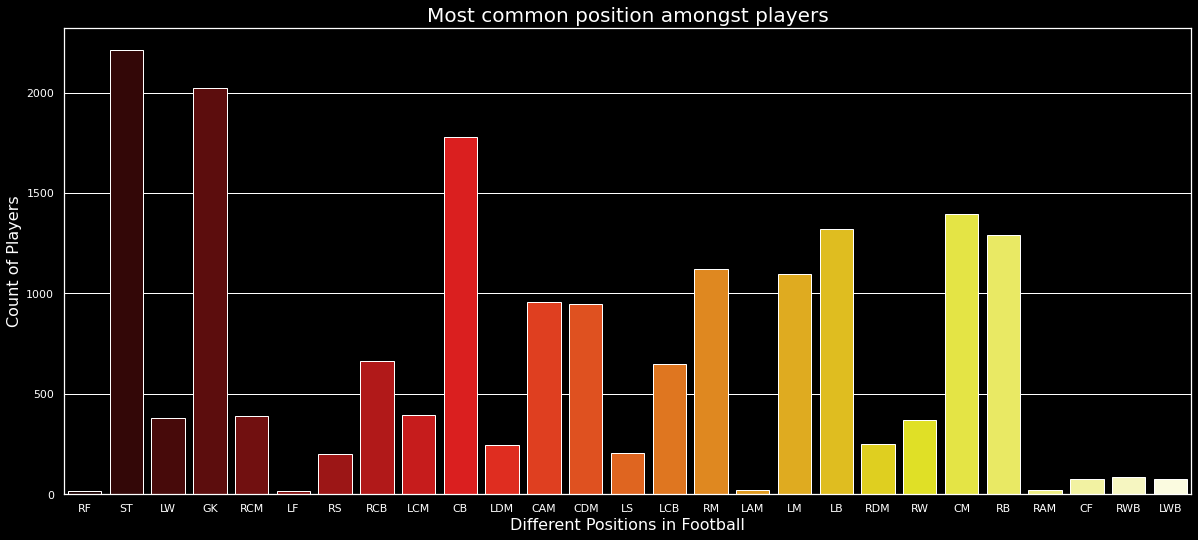

In [209]:
plt.figure(figsize = (18, 8))
# plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'hot')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Most common position amongst players', fontsize = 20)
plt.show()

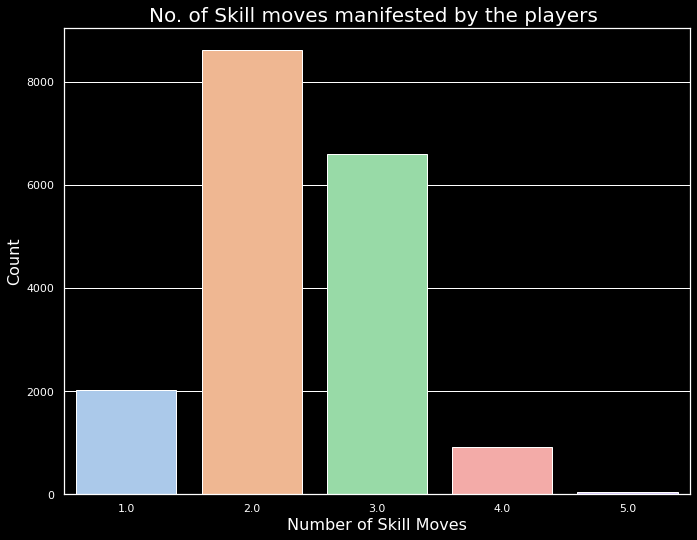

In [210]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'No. of Skill moves manifested by the players ', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

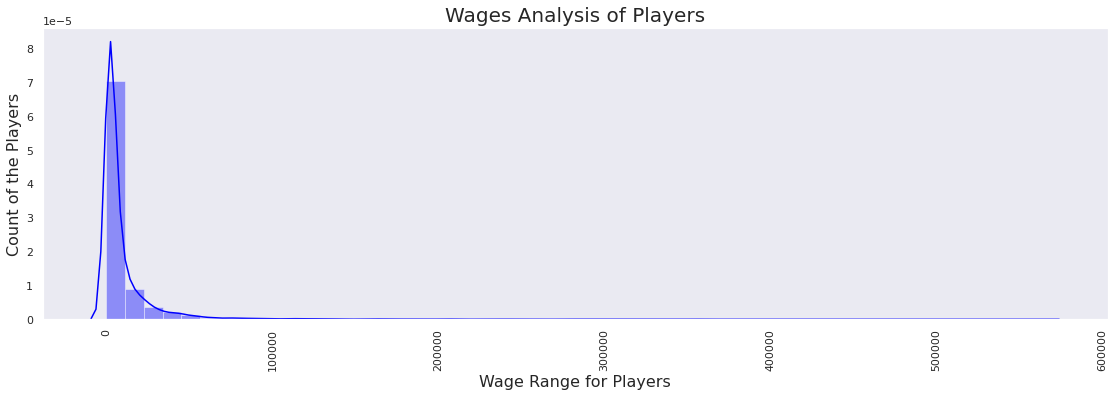

In [214]:
plt.rcParams['figure.figsize'] = (17, 5)
sns.distplot(data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Wages Analysis of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

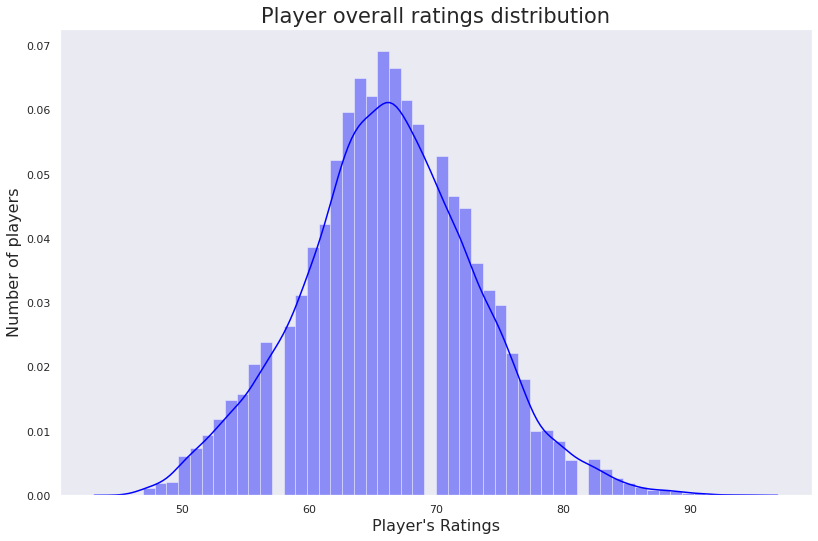

In [212]:
# To show Different overall scores of the players participating in the FIFA 2019
sns.set(style = "dark", palette = "Accent_r", color_codes = True)
plt.figure(figsize = (12,8))
ax = sns.distplot(data.Overall, bins = 52, color = 'blue')
ax.set_xlabel(xlabel = "Player\'s Ratings", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Player overall ratings distribution', fontsize = 21)
plt.show()

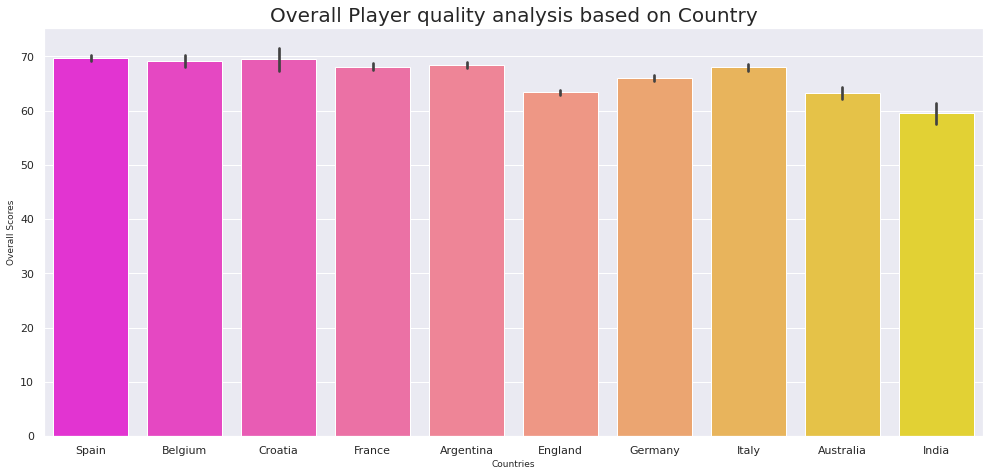

In [226]:

countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Australia', 'Italy', 'India', 'Croatia', 'Belgium')
data_countries = data.loc[data['Nationality'].isin(countries) & data['Overall']]
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Overall Player quality analysis based on Country', fontsize = 20)
plt.show()

In [228]:
print("Countries with heighest number of players.")
data['Nationality'].value_counts().head(8)

Countries with heighest number of players.


England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Brazil        827
Italy         702
Colombia      618
Name: Nationality, dtype: int64

In [231]:
df['Club'].head(30)

0            FC Barcelona
1                Juventus
2     Paris Saint-Germain
3       Manchester United
4         Manchester City
5                 Chelsea
6             Real Madrid
7            FC Barcelona
8             Real Madrid
9         Atlético Madrid
10      FC Bayern München
11            Real Madrid
12        Atlético Madrid
13        Manchester City
14                Chelsea
15               Juventus
16      Tottenham Hotspur
17        Atlético Madrid
18           FC Barcelona
19            Real Madrid
20           FC Barcelona
21    Paris Saint-Germain
22      FC Bayern München
23        Manchester City
24               Juventus
25    Paris Saint-Germain
26              Liverpool
27            Real Madrid
28      FC Bayern München
29                 Napoli
Name: Club, dtype: object

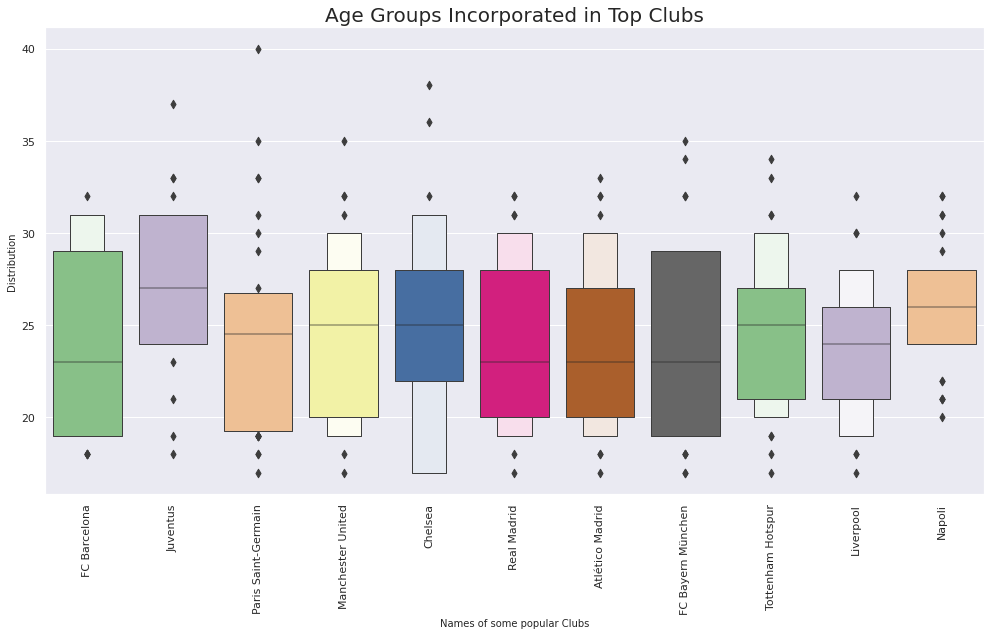

In [235]:
# Distribution of Ages in some Popular clubs

some_clubs = ('Juventus', 'Paris Saint-Germain', 'Manchester United', 'FC Bayern München', 'Atlético Madrid', 'Liverpool',
             'Tottenham Hotspur', 'FC Barcelona', 'Napoli', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'Accent')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Age Groups Incorporated in Top Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

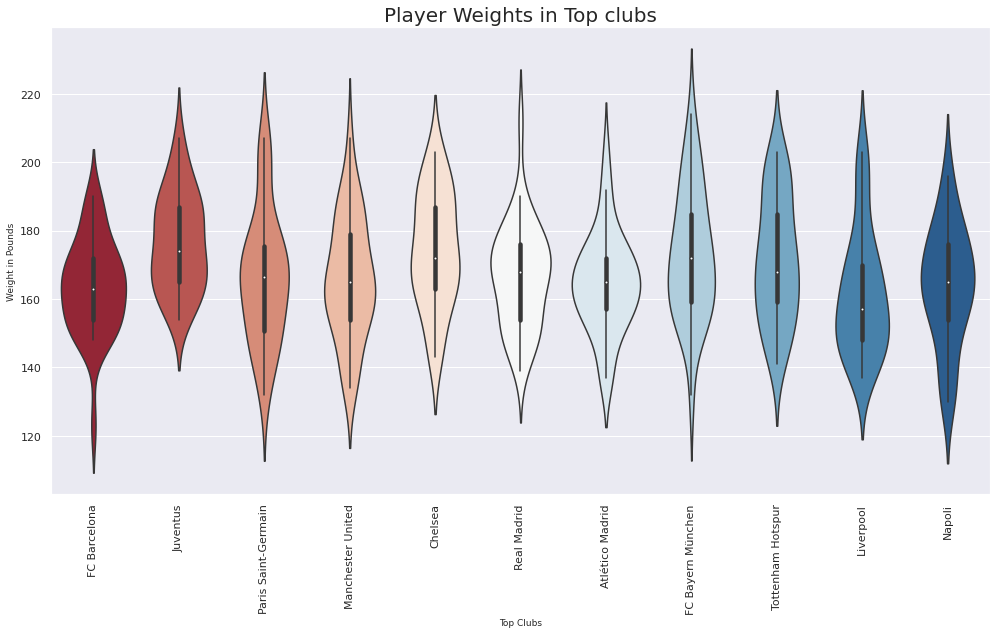

In [238]:
some_clubs = ('Juventus', 'Paris Saint-Germain', 'Manchester United', 'FC Bayern München', 'Atlético Madrid', 'Liverpool',
             'Tottenham Hotspur', 'FC Barcelona', 'Napoli', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.violinplot(x = 'Club', y = 'Weight', data = data_clubs, palette = 'RdBu')
ax.set_xlabel(xlabel = 'Top Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in Pounds', fontsize = 9)
ax.set_title(label = 'Player Weights in Top clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [241]:
# 15 most aged players

data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('jet_r')

,Name,Age,Club,Nationality
4741,O. Pérez,45,Pachuca,Mexico
18183,K. Pilkington,44,Cambridge United,England
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago
10545,S. Narazaki,42,Nagoya Grampus,Japan
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina
1120,J. Villar,41,No Club,Paraguay
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia
15426,M. Tyler,41,Peterborough United,England
4228,B. Nivet,41,ESTAC Troyes,France
10356,F. Kippe,40,Lillestrøm SK,Norway


In [243]:
# 15 youngest players

data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('Accent')

,Name,Age,Club,Nationality
18206,G. Nugent,16,Tranmere Rovers,England
17743,J. Olstad,16,Sarpsborg 08 FF,Norway
13293,H. Massengo,16,AS Monaco,France
16081,J. Italiano,16,Perth Glory,Australia
18166,N. Ayéva,16,Örebro SK,Sweden
17712,K. Broda,16,Wisła Kraków,Poland
17354,L. D'Arrigo,16,Adelaide United,Australia
13567,Y. Verschaeren,16,RSC Anderlecht,Belgium
16927,B. Nygren,16,IFK Göteborg,Sweden
18018,B. O'Gorman,16,Bray Wanderers,Republic of Ireland


In [247]:
# Top left footted players

data[data['Preferred Foot'] == 'Left'][['Name', 'Overall','Age', 'Club', 'Nationality']].head(10).style.background_gradient('hot')

,Name,Overall,Age,Club,Nationality
0,L. Messi,94,31,FC Barcelona,Argentina
13,David Silva,90,32,Manchester City,Spain
15,P. Dybala,89,24,Juventus,Argentina
17,A. Griezmann,89,27,Atlético Madrid,France
19,T. Courtois,89,26,Real Madrid,Belgium
24,G. Chiellini,89,33,Juventus,Italy
26,M. Salah,88,26,Liverpool,Egypt
28,J. Rodríguez,88,26,FC Bayern München,Colombia
35,Marcelo,88,30,Real Madrid,Brazil
36,G. Bale,88,28,Real Madrid,Wales


In [248]:
# Top left footted players

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('magma')

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


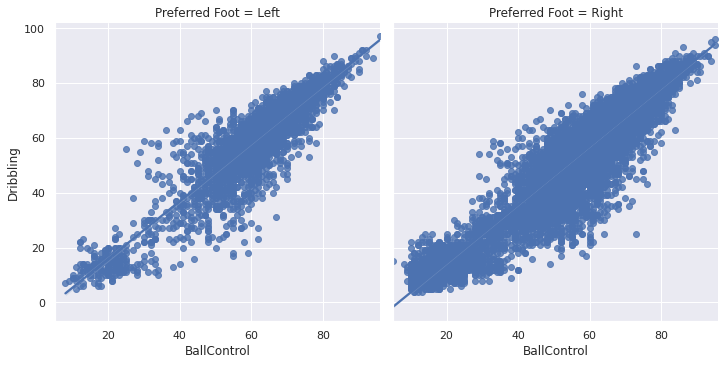

In [255]:
#Best ball control and dribblers are very few
#Most lie in the middle area
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

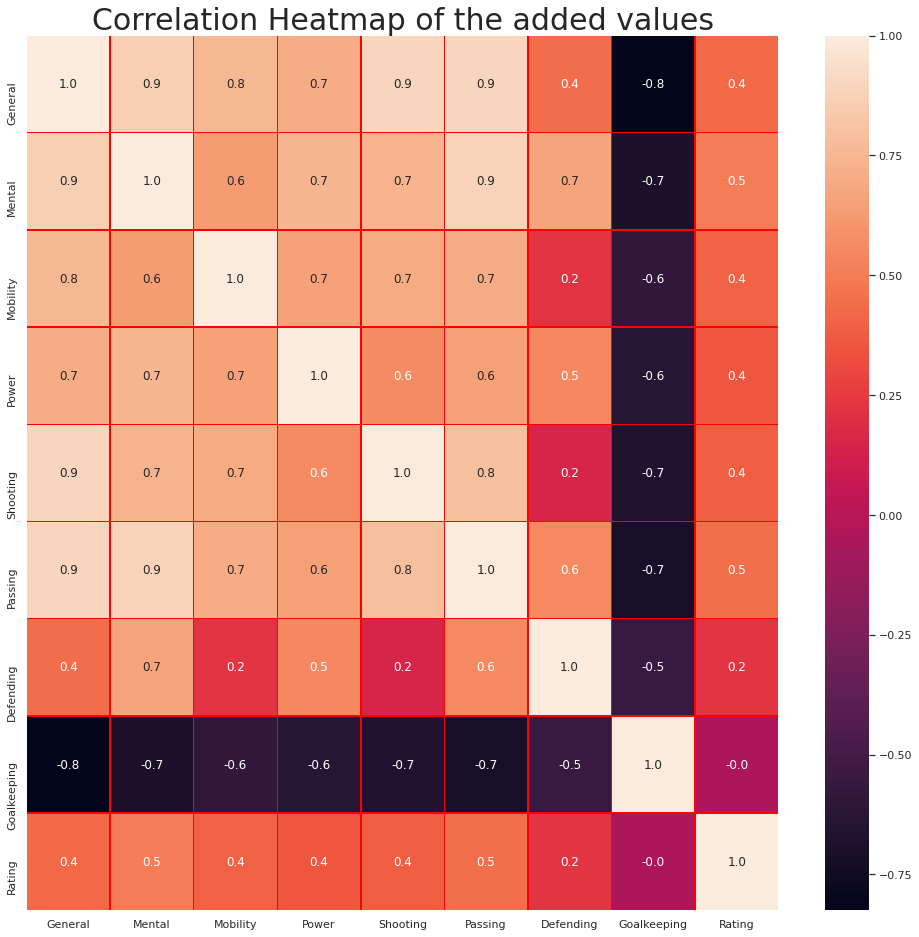

In [263]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(data[['General', 'Mental', 'Mobility', 'Power', 'Shooting',
       'Passing', 'Defending', 'Goalkeeping', 'Rating']].corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f')
plt.title('Correlation Heatmap of the added values', fontsize = 30)
plt.show()

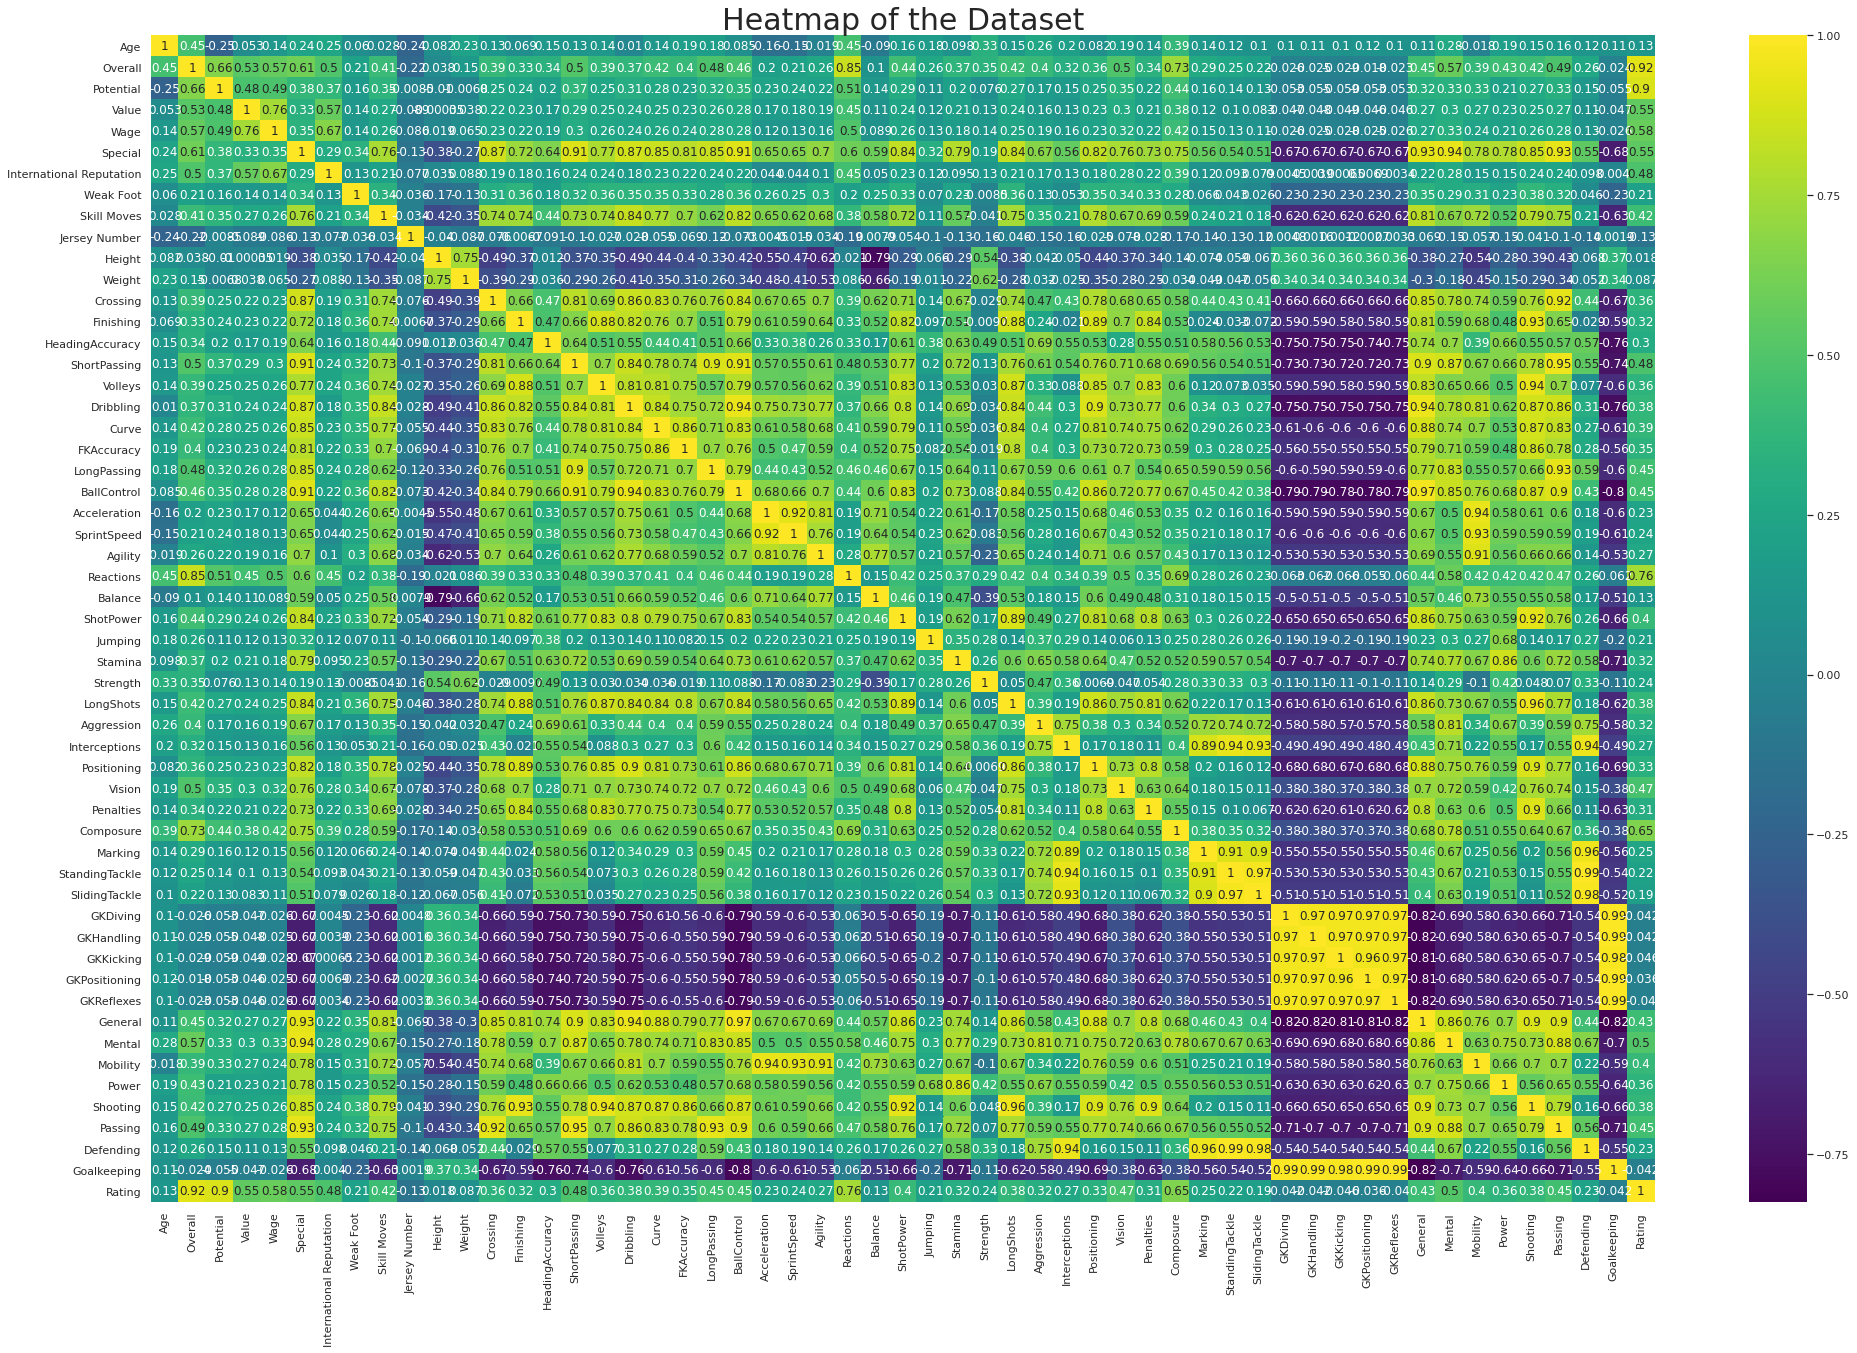

In [264]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

### Now Lets try to do some Geo Data Analysis.

In [272]:
from iso3166 import countries
import plotly.express as px

Code taken from the pycountry documentation.

We need each country's ISO 3166 code to refer to it on the map, hence the addition of new attribute for tracing back to map in reference to the data

In [273]:
country_dict = {}
for c in countries:
    country_dict[c.name] = c.alpha3
    
df['alpha3'] = df['Nationality']
df = df.replace({"alpha3": country_dict})

gbr = ['England', 'Wales', 'Scotland', 'Northern Ireland']

df.loc[df['Nationality'].isin(gbr), 'alpha3'] = 'GBR'
df.loc[df['Nationality'] == 'Bosnia Herzegovina', 'alpha3'] = 'BIH'
df.loc[df['Nationality'] == 'Korea Republic', 'alpha3'] = 'KOR'
df.loc[df['Nationality'] == 'Czech Republic', 'alpha3'] = 'CZE'
df.loc[df['Nationality'] == 'St Lucia', 'alpha3'] = 'LCA'
df.loc[df['Nationality'] == 'Palestine', 'alpha3'] = 'PSE'
df.loc[df['Nationality'] == 'Antigua & Barbuda', 'alpha3'] = 'ATG'
df.loc[df['Nationality'] == 'St Kitts Nevis', 'alpha3'] = 'KNA'
df.loc[df['Nationality'] == 'Korea DPR', 'alpha3'] = 'PRK'
df.loc[df['Nationality'] == 'São Tomé & Príncipe', 'alpha3'] = 'STP'
df.loc[df['Nationality'] == 'Trinidad & Tobago', 'alpha3'] = 'TTO'
df.loc[df['Nationality'] == 'Bolivia', 'alpha3'] = 'BOL'
df.loc[df['Nationality'] == 'Moldova', 'alpha3'] = 'MDA'
df.loc[df['Nationality'] == 'Curacao', 'alpha3'] = 'CUW'
df.loc[df['Nationality'] == 'Tanzania', 'alpha3'] = 'TZA'
df.loc[df['Nationality'] == 'Guinea Bissau', 'alpha3'] = 'GNB'
df.loc[df['Nationality'] == 'China PR', 'alpha3'] = 'CHN'
df.loc[df['Nationality'] == 'FYR Macedonia', 'alpha3'] = 'MKD'
df.loc[df['Nationality'] == 'Iran', 'alpha3'] = 'IRN'
df.loc[df['Nationality'] == 'Syria', 'alpha3'] = 'SYR'
df.loc[df['Nationality'] == 'Cape Verde', 'alpha3'] = 'CPV'
df.loc[df['Nationality'] == 'United States', 'alpha3'] = 'USA'
df.loc[df['Nationality'] == 'Republic of Ireland', 'alpha3'] = 'IRL'
df.loc[df['Nationality'] == 'Venezuela', 'alpha3'] = 'VEN'
df.loc[df['Nationality'] == 'Russia', 'alpha3'] = 'RUS'
df.loc[df['Nationality'] == 'Ivory Coast', 'alpha3'] = 'CIV'
df.loc[df['Nationality'] == 'DR Congo', 'alpha3'] = 'COD'
df.loc[df['Nationality'] == 'Central African Rep.', 'alpha3'] = 'CAF'

In [280]:
data = df.groupby(['alpha3', 'Nationality'])['Name'].count().reset_index()
data.columns = ['alpha3', 'nationality', 'count']

fig = px.choropleth(
    data, 
    locations="alpha3",
    hover_name='nationality',
    color='count',
    projection="natural earth",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Map for number of players from each country',
    width=1000, 
    height=600
)

fig.show()

In [279]:
data = df.groupby(['alpha3', 'Nationality'])['Overall'].max().reset_index()
data.columns = ['alpha3', 'nationality', 'max_rating']

fig = px.choropleth(
    data, 
    locations="alpha3",
    hover_name='nationality',
    color="max_rating",
    projection="natural earth",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='How good is a country at Football?(Based on player ratings)',
    width=1000, 
    height=600
)

fig.show()